# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
import scipy.stats as stats

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

## Data Overview

- Observations
- Sanity checks

In [2]:
df = pd.read_csv('EasyVisa.csv') 

In [3]:
data=df.copy()

In [4]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [6]:
data.shape

(25480, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


- The dataset includes integer columns for workforce and establishment details, a floating-point column for precise wage data, and object columns representing categorical variables like continent, education, and employment status, allowing for comprehensive analysis encompassing both quantitative and qualitative aspects of employment cases.

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [10]:
data['case_id'].unique

<bound method Series.unique of 0           EZYV01
1           EZYV02
2           EZYV03
3           EZYV04
4           EZYV05
           ...    
25475    EZYV25476
25476    EZYV25477
25477    EZYV25478
25478    EZYV25479
25479    EZYV25480
Name: case_id, Length: 25480, dtype: object>

In [11]:
data.drop('case_id', axis=1, inplace=True)

In [12]:
negative_employee_values = data.loc[data['no_of_employees'] < 0]
print('The total negative values in the employee column ', negative_employee_values.shape)

The total negative values in the employee column  (33, 11)


In [13]:
data["no_of_employees"] = abs(data["no_of_employees"])

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


The summary statistics for three key columns are as follows:

- no_of_employees: The dataset contains a wide range of employee counts, with a mean of approximately 5,667 employees. The minimum is negative (possibly an error), and the maximum is very high at 602,069 employees.

- yr_of_estab: The year of establishment ranges from 1800 to 2016, with a mean establishment year of approximately 1979.

- prevailing_wage: Prevailing wages vary considerably, with a mean of approximately $74,456. The wages range from a minimum of $2.14 to a maximum of $319,210.27. These statistics offer insights into the distribution and variability of employee counts, establishment years, and prevailing wages in the dataset.

In [15]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])# Replace strings with an integer
data.head(10)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
8,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.1900,Year,Y,Certified
9,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [16]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [18]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [19]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

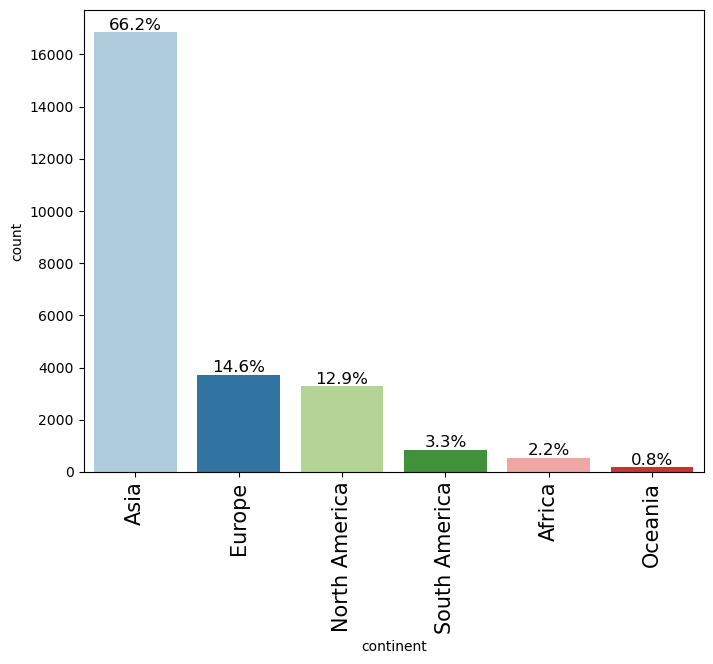

In [20]:
labeled_barplot(data, "continent",perc=True)

#### Observations

- Asia has the highest number of employees applying for the visa.

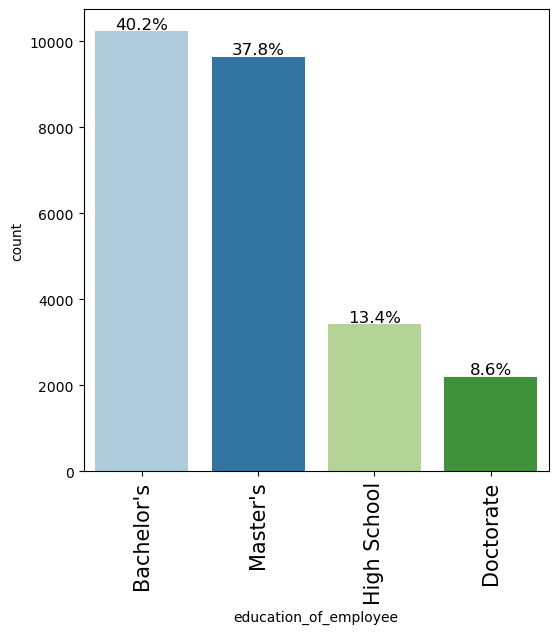

In [21]:
labeled_barplot(data, "education_of_employee",perc=True)

#### Observation

- A little over 75% of the total populations have completed Bachelors or Masters Degree

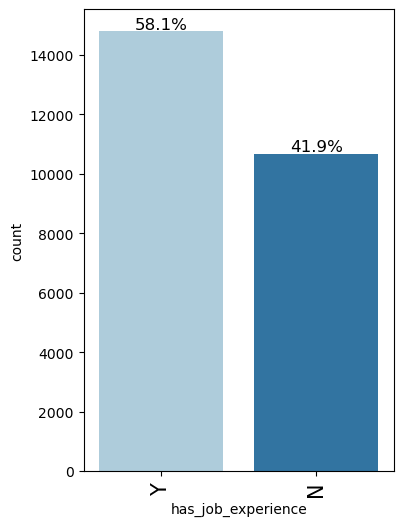

In [22]:
labeled_barplot(data, "has_job_experience",perc=True)

#### Observations

- Out of the total population applying for visa 58% have some job experience

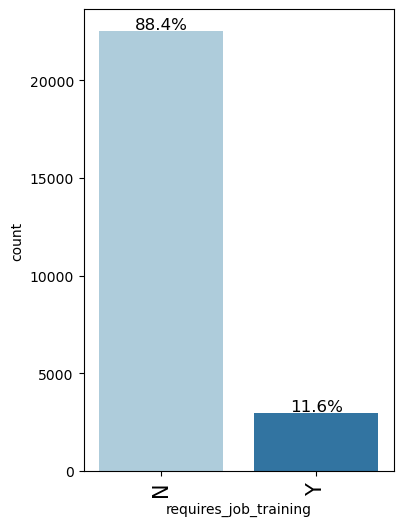

In [23]:
labeled_barplot(data, "requires_job_training",perc=True)

#### Observation

- 88% of the total applicants do not require any job training

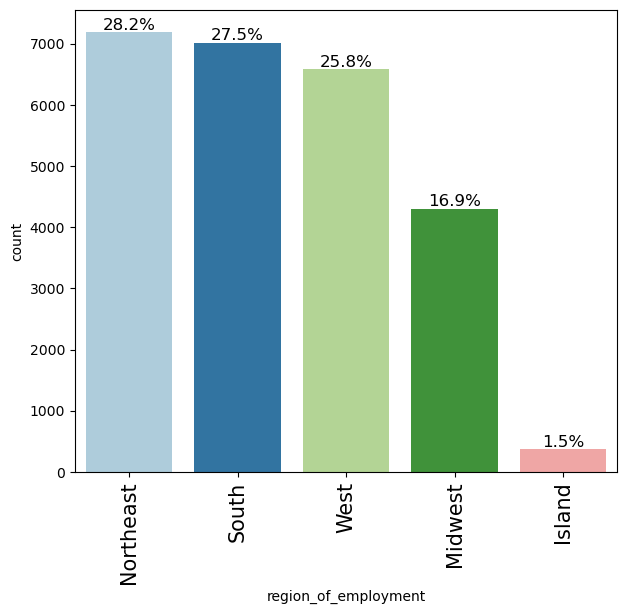

In [24]:
labeled_barplot(data, "region_of_employment",perc=True)

#### Observations

- Northeast, South and West have very similar interests in terms of region preferences.
- Only 1.5% intend to work on a island

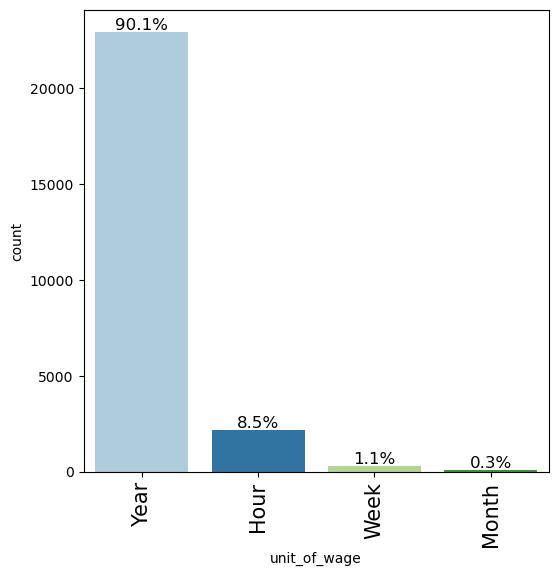

In [25]:
labeled_barplot(data, "unit_of_wage",perc=True)

#### Observations

- This suggests that most employers are willing to pay foreign workers yearly wages, followed by hourly wages, weekly wages, and monthly wages. 

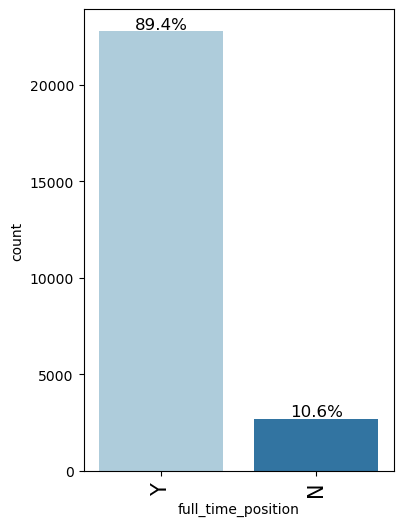

In [26]:
labeled_barplot(data, "full_time_position",perc=True)

#### Observations

- 89% employers offer full time positions to foreign worker.

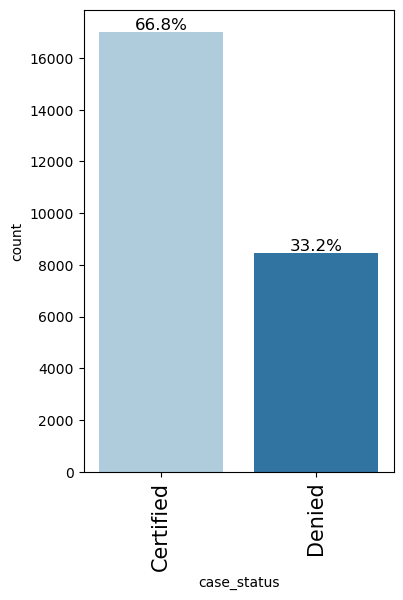

In [27]:
labeled_barplot(data, "case_status",perc=True)

#### Observations:

- The percentage of certified cases is 66.8%, while the percentage of denied cases is 33.2%.

### Bivariate Analysis

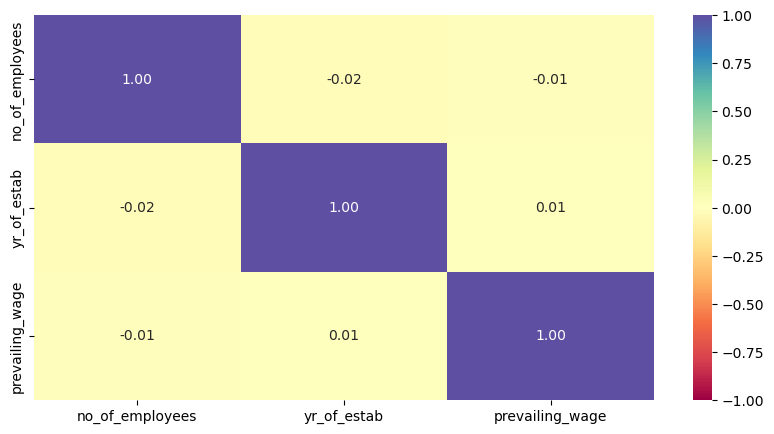

In [28]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
   data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
) 
plt.show()

#### Observations

- There's no strong correlations between all the variables.

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


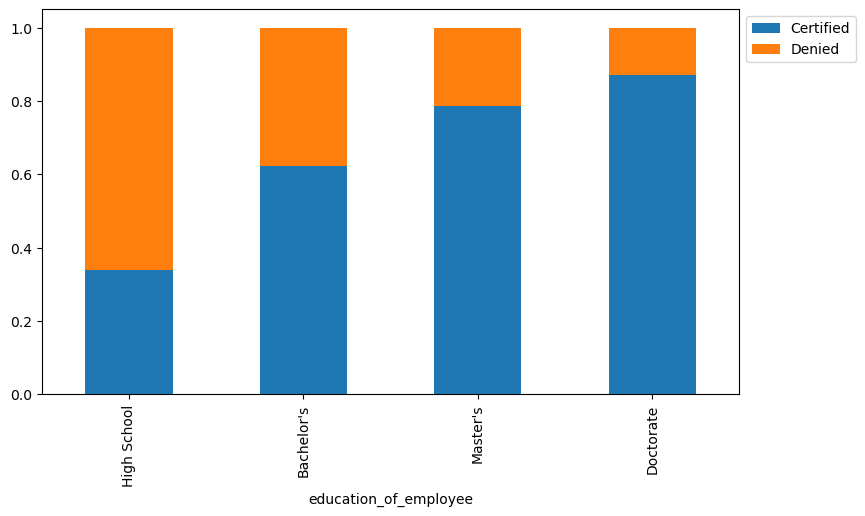

In [29]:
stacked_barplot(data, "education_of_employee", "case_status")

#### Observations

- Barplot shows us that those with higher level of education have a better chances getting their visa approved.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


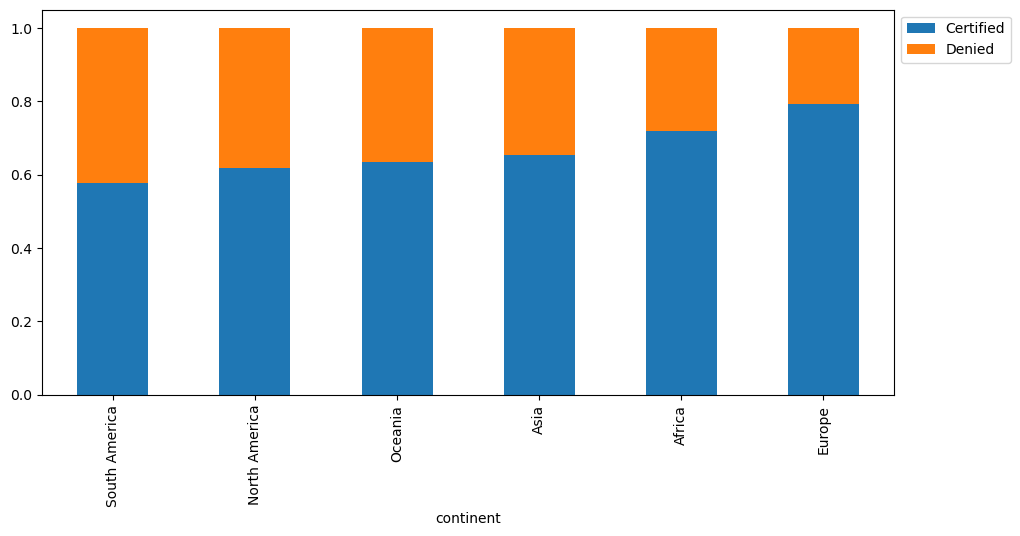

In [30]:
stacked_barplot(data, "continent", "case_status")

#### Observations

- The table displays the distribution of case statuses for immigration cases across various continents. In total, there were 25,480 cases, with 17,018 cases certified and 8,462 cases denied.
-  Asia had the highest number of certified cases, totaling 11,012, . Europe had the second-highest number of certified cases at 2,957, while Asia also had a significant number of denied cases, totaling 5,849. 

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


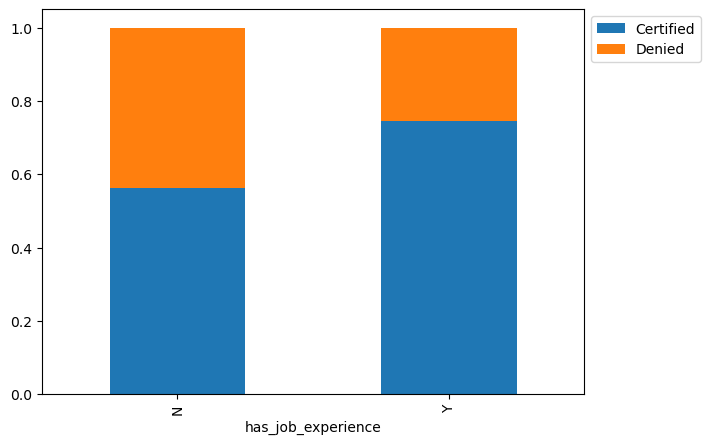

In [31]:
stacked_barplot(data, "has_job_experience", "case_status")

#### Observations

- Only 55% of the people are approved without any job experience whereas little over 80% applicants are approved with prior job experience.
- 45% denial without any experience versus less that 20% for applicants with experience.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


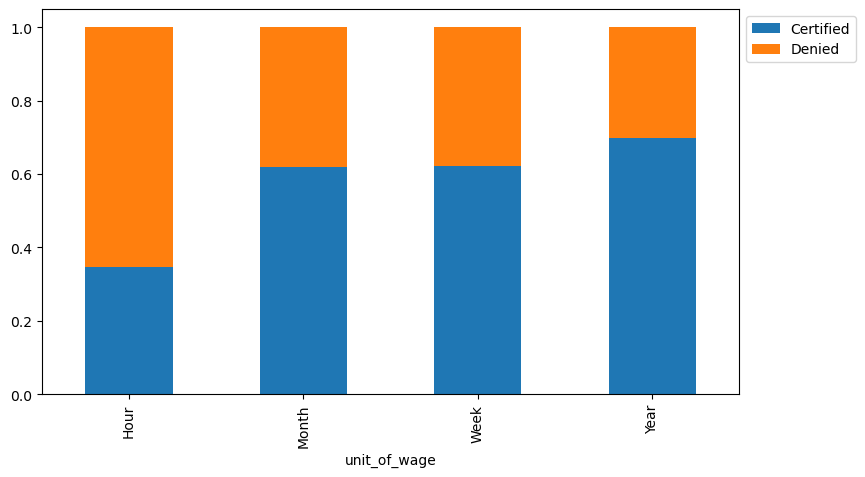

In [32]:
stacked_barplot(data, "unit_of_wage", "case_status")

#### Observations

- The most preffered unit of pay in Yearly with a total of 22,962 applicants out of with 16,000 applicants are approved.

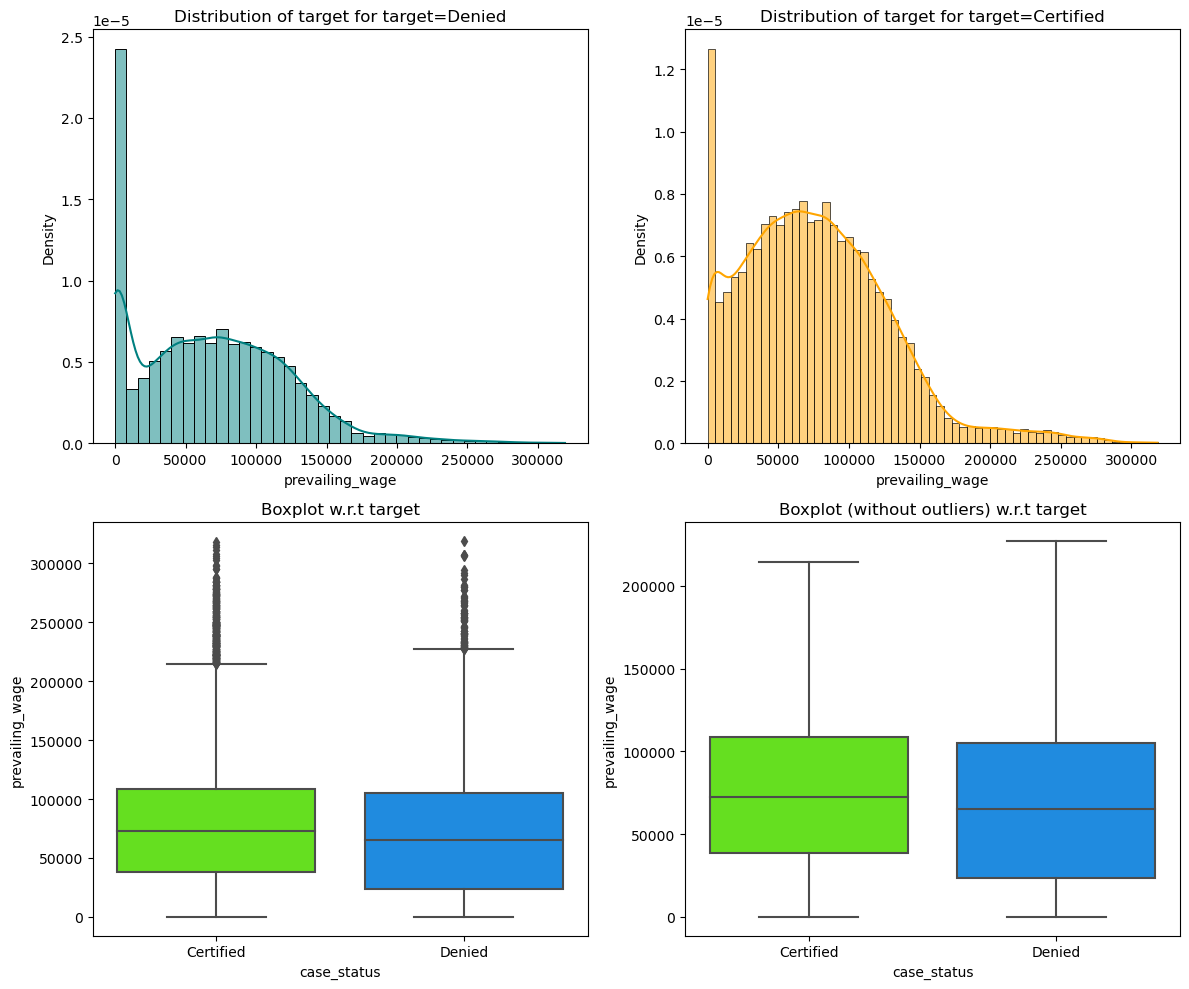

In [33]:
distribution_plot_wrt_target(data,'prevailing_wage', 'case_status')

#### Observations 

- The graph shows that the prevailing wage for certified cases is higher than the prevailing wage for denied cases. This suggests that the prevailing wage is a positive predictor of the case status.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [34]:
data.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

No missing values.

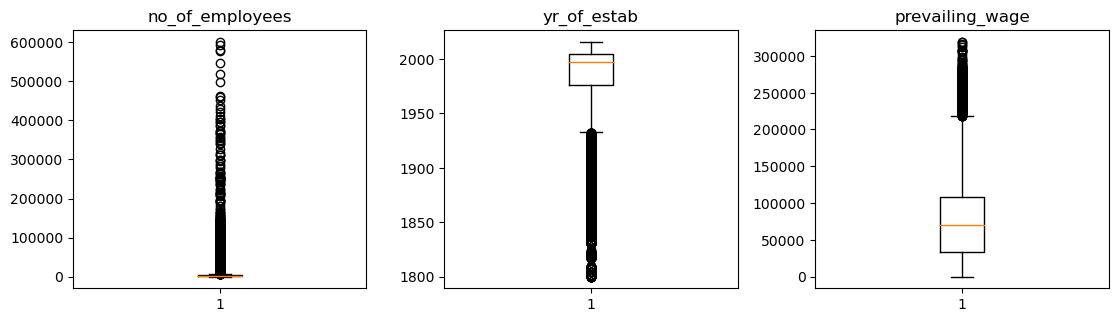

In [35]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values

In [36]:
## We want to predict if the case status is certified
data["case_status"] = data["case_status"].apply(
    lambda x: 1 if x == "Certified" else 0
)

In [37]:
X = data.drop(["case_status"], axis=1)
Y = data["case_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1,stratify=Y
)



In [38]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


In [39]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [40]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

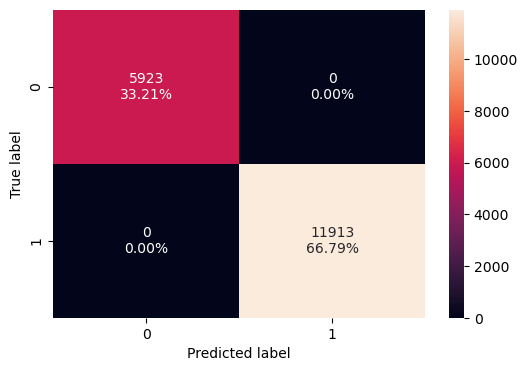

In [42]:
confusion_matrix_sklearn(dtree, X_train, y_train)

In [43]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


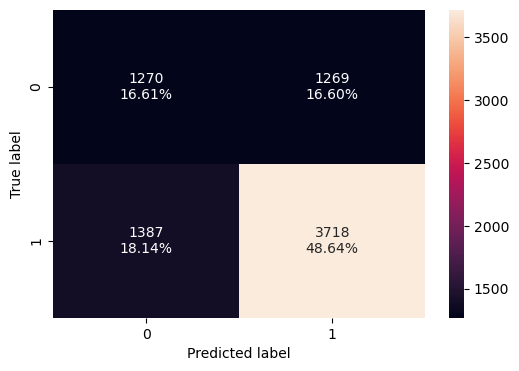

In [44]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [45]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.652538  0.728306   0.745538  0.736821


-  Decision tree is working well on the training data but is not able to generalize well on the test data concerning the recall.

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [46]:
X_train.columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America', 'education_of_employee_Doctorate',
       'education_of_employee_High School', 'education_of_employee_Master's',
       'has_job_experience_Y', 'requires_job_training_Y',
       'region_of_employment_Midwest', 'region_of_employment_Northeast',
       'region_of_employment_South', 'region_of_employment_West',
       'unit_of_wage_Month', 'unit_of_wage_Week', 'unit_of_wage_Year',
       'full_time_position_Y'],
      dtype='object')

continent    Africa   Asia  Europe  North America  Oceania  South America  \
case_status                                                                 
All             551  16861    3732           3292      192            852   
1               397  11012    2957           2037      122            493   
0               154   5849     775           1255       70            359   

continent      All  
case_status         
All          25480  
1            17018  
0             8462  
------------------------------------------------------------------------------------------------------------------------


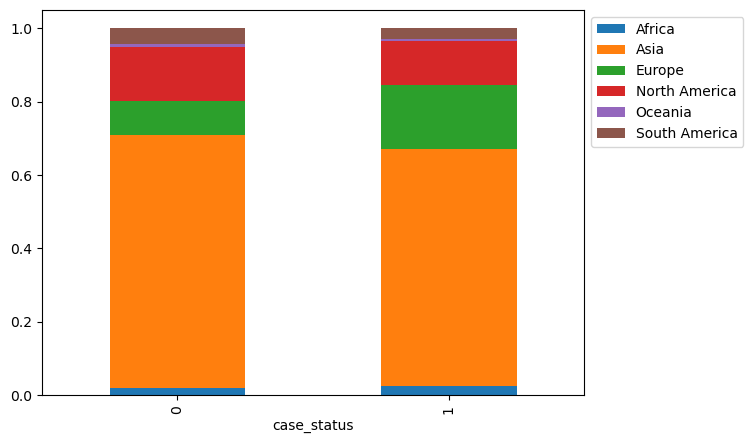

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
case_status                                                               
All                         10234       2192         3420      9634  25480
1                            6367       1912         1164      7575  17018
0                            3867        280         2256      2059   8462
------------------------------------------------------------------------------------------------------------------------


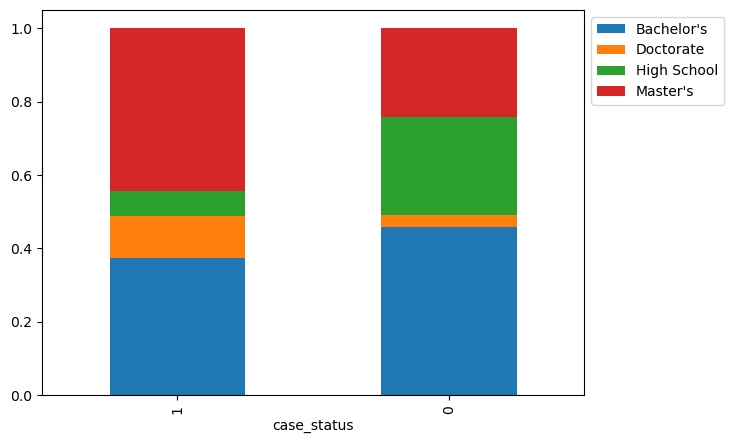

has_job_experience      N      Y    All
case_status                            
All                 10678  14802  25480
1                    5994  11024  17018
0                    4684   3778   8462
------------------------------------------------------------------------------------------------------------------------


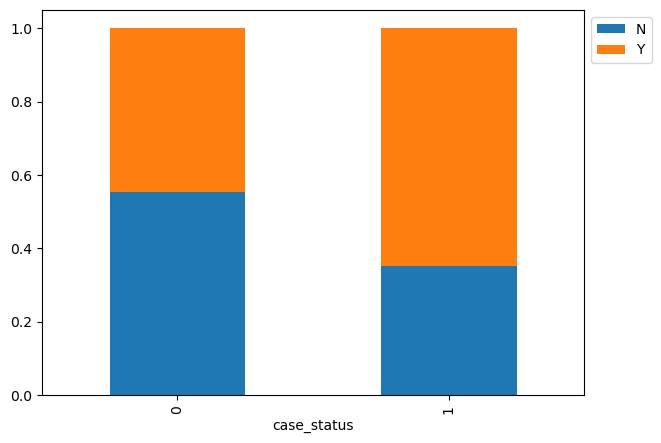

requires_job_training      N     Y    All
case_status                              
All                    22525  2955  25480
1                      15012  2006  17018
0                       7513   949   8462
------------------------------------------------------------------------------------------------------------------------


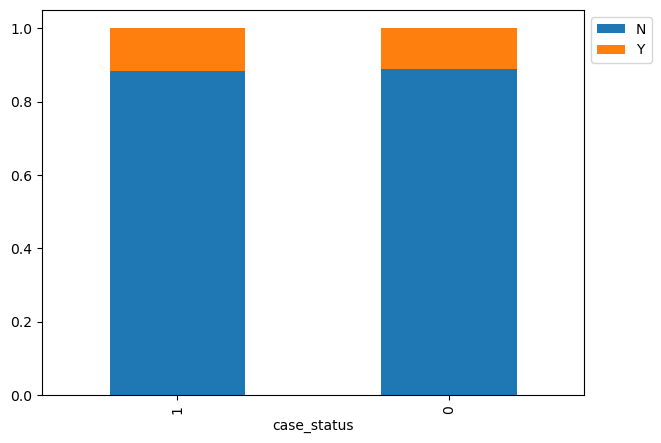

region_of_employment  Island  Midwest  Northeast  South  West    All
case_status                                                         
All                      375     4307       7195   7017  6586  25480
1                        226     3253       4526   4913  4100  17018
0                        149     1054       2669   2104  2486   8462
------------------------------------------------------------------------------------------------------------------------


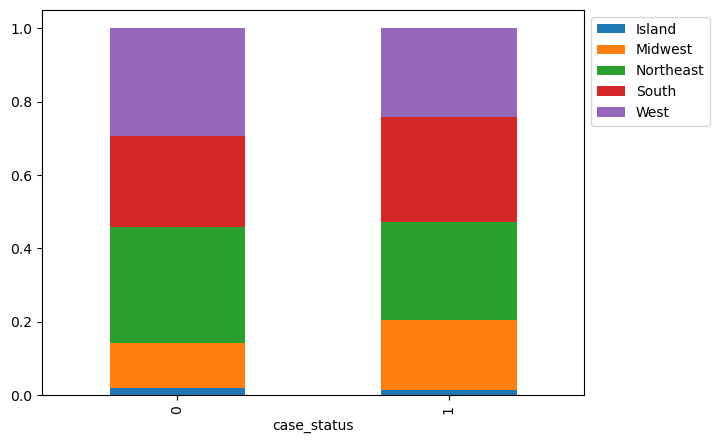

unit_of_wage  Hour  Month  Week   Year    All
case_status                                  
All           2157     89   272  22962  25480
1              747     55   169  16047  17018
0             1410     34   103   6915   8462
------------------------------------------------------------------------------------------------------------------------


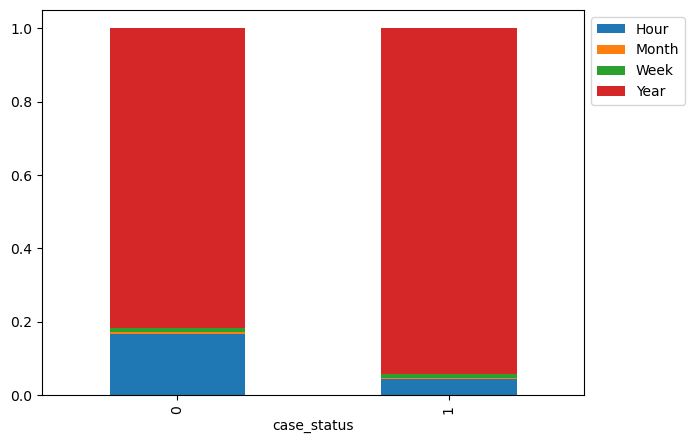

full_time_position     N      Y    All
case_status                           
All                 2707  22773  25480
1                   1855  15163  17018
0                    852   7610   8462
------------------------------------------------------------------------------------------------------------------------


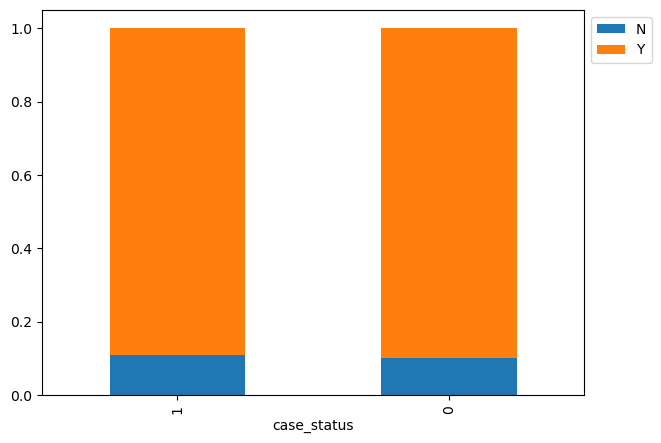

case_status      1     0    All
case_status                    
0                0  8462   8462
All          17018  8462  25480
1            17018     0  17018
------------------------------------------------------------------------------------------------------------------------


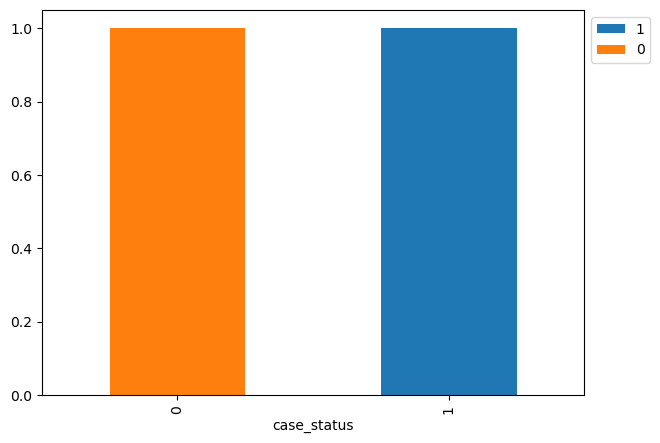

In [47]:
 # Table and stacked barplot for each variable with a data type of category by case_status
cols_cat = data.select_dtypes(['category'])
for i in cols_cat.columns:
    stacked_barplot(data, "case_status", i)

## Building bagging and boosting models

In [48]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

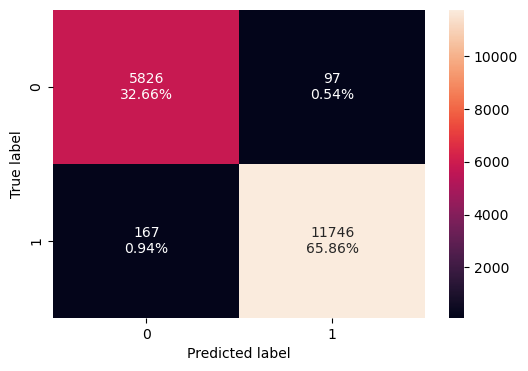

In [49]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [50]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887


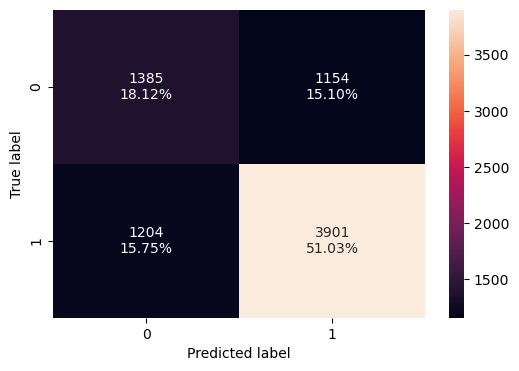

In [51]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [52]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913


* Bagging classifier is overfitting on the training set and is performing poorly on the test set.

**Bagging Classifier with weighted decision tree**

In [53]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.17,
                                                                      1: 0.83},
                                                        random_state=1),
                  random_state=1)

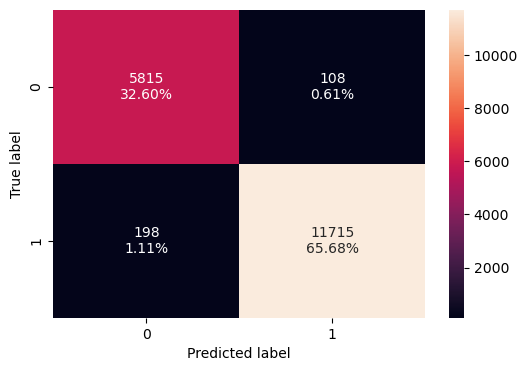

In [54]:
confusion_matrix_sklearn(bagging_wt,X_train,y_train)

In [55]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.982844  0.98338   0.990865  0.987108


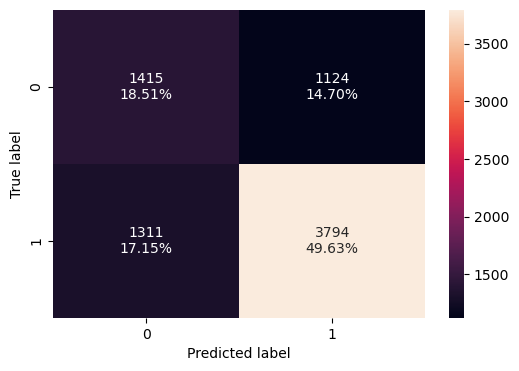

In [56]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [57]:
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.68145  0.743193   0.771452  0.757059


* Bagging Classifier with weighted decision tree is overfitting on the training set and is performing poorly on the test set.

### Random Forest

In [58]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

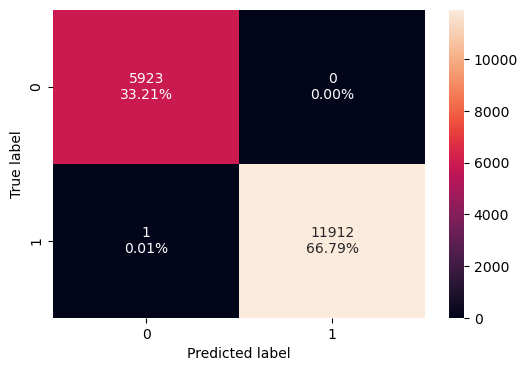

In [59]:
confusion_matrix_sklearn(rf,X_train,y_train)

In [60]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958


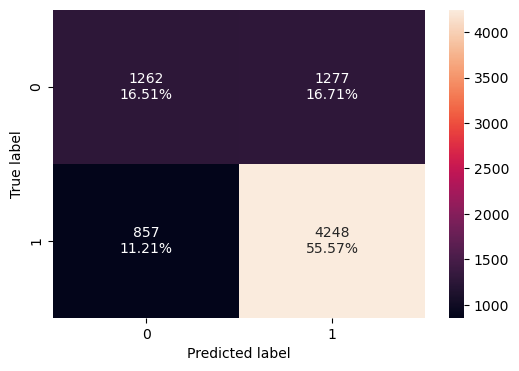

In [61]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [62]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.720827  0.832125   0.768869  0.799247


* Random forest has performed slightly better than other models but we can say its still overfitting

**Random forest with class weights**

In [63]:
rf_wt = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

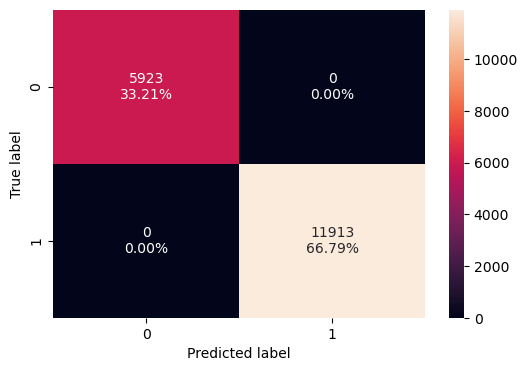

In [64]:
confusion_matrix_sklearn(rf_wt, X_train,y_train)

In [65]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


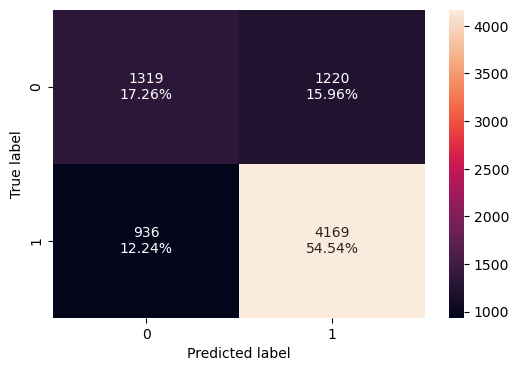

In [66]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [67]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy   Recall  Precision        F1
0  0.717949  0.81665   0.773613  0.794549


* There is not much improvement in metrics of weighted random forest as compared to the unweighted random forest.

## Tuning Models

### Tuning Decision Tree

In [68]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 21, 5),
    "min_samples_leaf": [1,3, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 13],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 

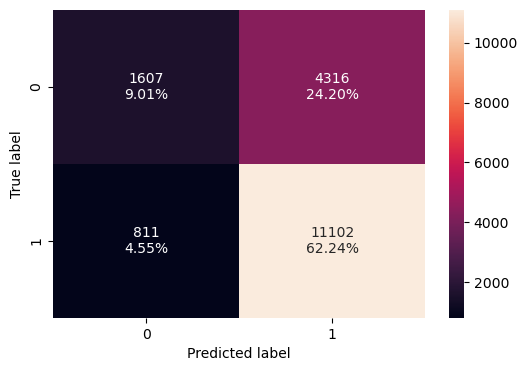

In [69]:
confusion_matrix_sklearn(dtree_estimator, X_train,y_train)

In [70]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411


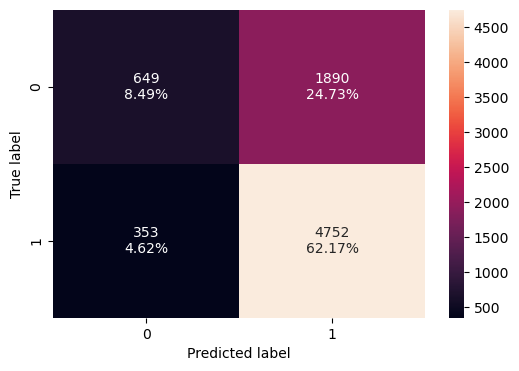

In [71]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

In [72]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058


- Train and Test data are very similar. 

### Tuning Bagging Classifier

In [73]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.13,1:0.87},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[51,76,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.13,
                                                                      1: 0.87},
                                                        random_state=1),
                  max_features=1, n_estimators=51, random_state=1)

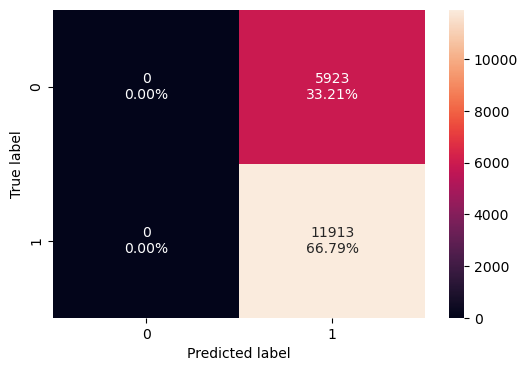

In [74]:
confusion_matrix_sklearn(bagging_estimator, X_train,y_train)

In [75]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.667919     1.0   0.667919  0.800901


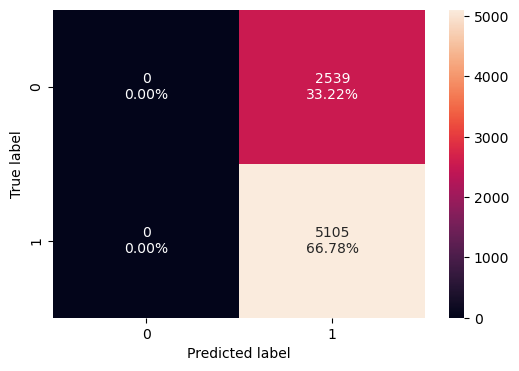

In [76]:
confusion_matrix_sklearn(bagging_estimator, X_test,y_test)

In [77]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision        F1
0  0.667844     1.0   0.667844  0.800847


- Train and Test data are very similar. 

### Tuning Random Forest

In [78]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

grid_obj = GridSearchCV(rf_tuned, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=5,
                       n_estimators=20, oob_score=True, random_state=1)

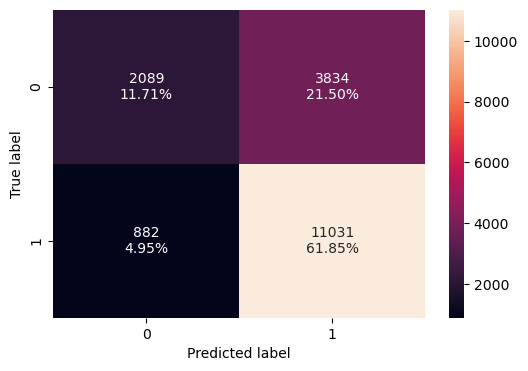

In [79]:
confusion_matrix_sklearn(rf_estimator, X_train,y_train)

In [80]:
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_tuned_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.735591  0.925963   0.742079  0.823885


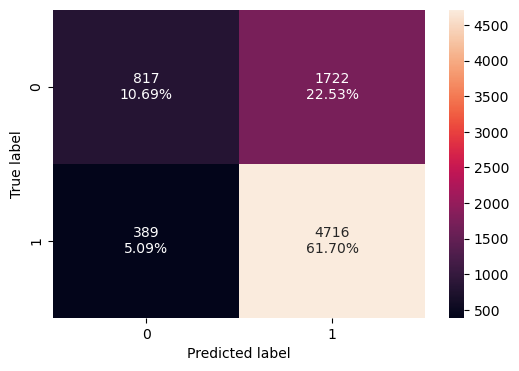

In [81]:
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

In [82]:
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n",rf_tuned_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision        F1
0  0.723836  0.9238   0.732526  0.817119


- Train and Test data are very similar. 

In [83]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(rf_estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.314738
prevailing_wage                    0.160746
has_job_experience_Y               0.126290
education_of_employee_Master's     0.122583
education_of_employee_Doctorate    0.070467
unit_of_wage_Year                  0.057157
continent_Europe                   0.049372
region_of_employment_Midwest       0.022726
no_of_employees                    0.012836
region_of_employment_West          0.012778
yr_of_estab                        0.009396
continent_Asia                     0.009007
continent_North America            0.008510
region_of_employment_South         0.008491
region_of_employment_Northeast     0.006130
continent_South America            0.002720
full_time_position_Y               0.001763
requires_job_training_Y            0.001455
continent_Oceania                  0.001224
unit_of_wage_Month                 0.000894
unit_of_wage_Week                  0.000716


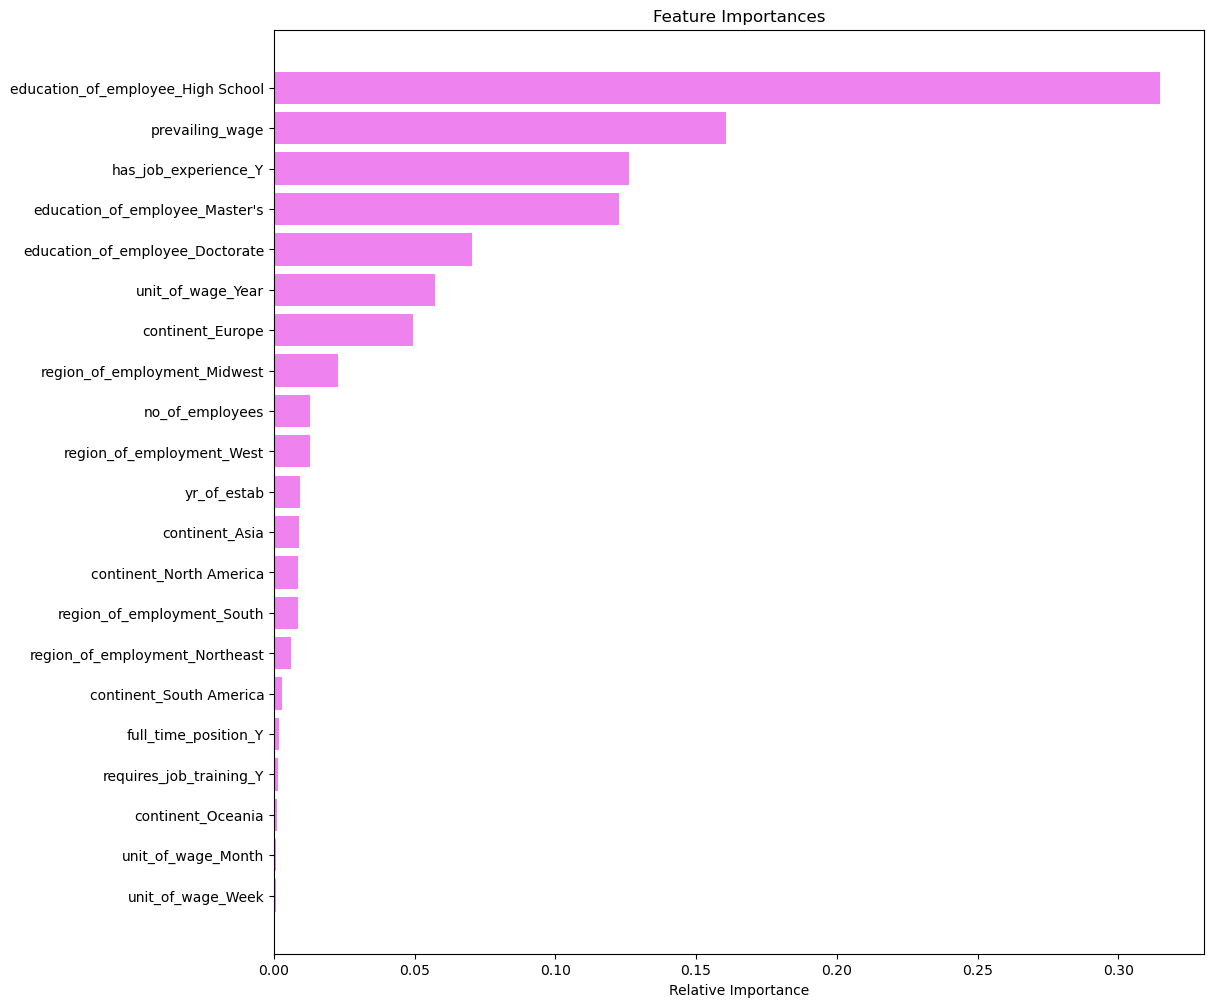

In [84]:
feature_names = X_train.columns
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Boosting - Model Building and Hyperparameter Tuning

In [85]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [86]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### AdaBoost Classifier

In [87]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

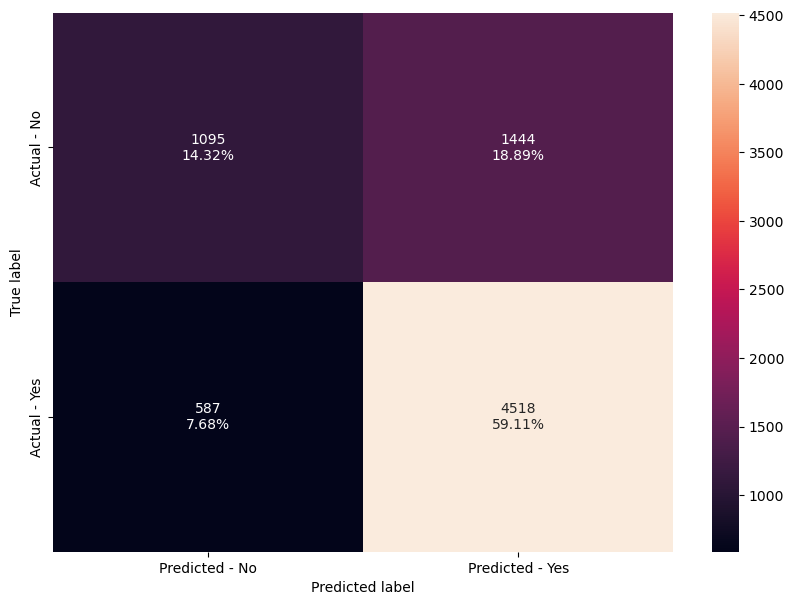

In [88]:
make_confusion_matrix(abc,y_test)

In [89]:
ab_classifier_model_train_perf = model_performance_classification_sklearn(abc, X_train,y_train)
print("Training performance \n",ab_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908


In [90]:
ab_classifier_model_test_perf = model_performance_classification_sklearn(abc, X_test,y_test)
print("Testing performance \n",ab_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


- Very Similar observations across all three parameters between training and testing set.

### Gradient Boosting Classifier

In [91]:
# Let's try using AdaBoost classifier as the estimator for initial predictions
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

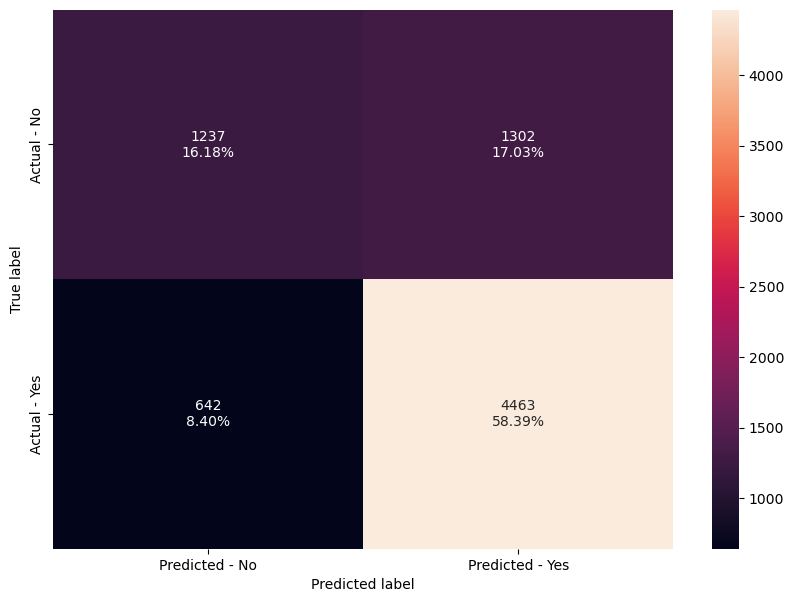

In [92]:
make_confusion_matrix(gbc_init,y_test)

In [93]:
gb_classifier_model_train_perf = model_performance_classification_sklearn(gbc_init, X_train,y_train)
print("Training performance \n",gb_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0   0.75869  0.881474   0.784066  0.829922


In [94]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(gbc_init, X_test,y_test)
print("Testing performance \n",gb_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.745683  0.874241   0.774154  0.821159


- Train and Test data are very similar. 

### XGBoost Classifier

In [95]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

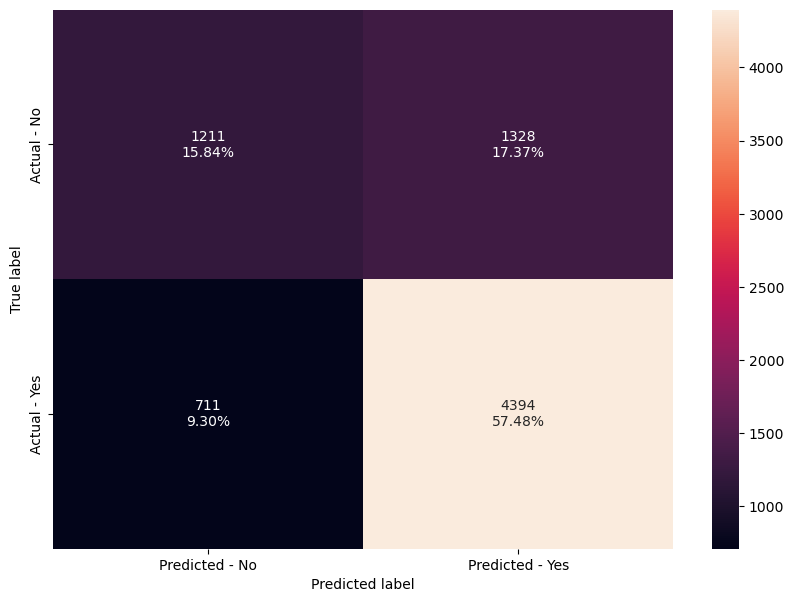

In [96]:
make_confusion_matrix(xgb,y_test)

In [97]:
Xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb, X_train,y_train)
print("Training performance \n",Xgb_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.838753  0.931419   0.843482  0.885272


In [98]:
Xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb, X_test,y_test)
print("Test performance \n",Xgb_classifier_model_test_perf)

Test performance 
    Accuracy    Recall  Precision        F1
0  0.733255  0.860725   0.767913  0.811675


- This model is slightly overfitting compared all other boosting techniques. But we can still say that the results are acceptable.

### Tuning - AdaBoost Classifier Classifier

In [99]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

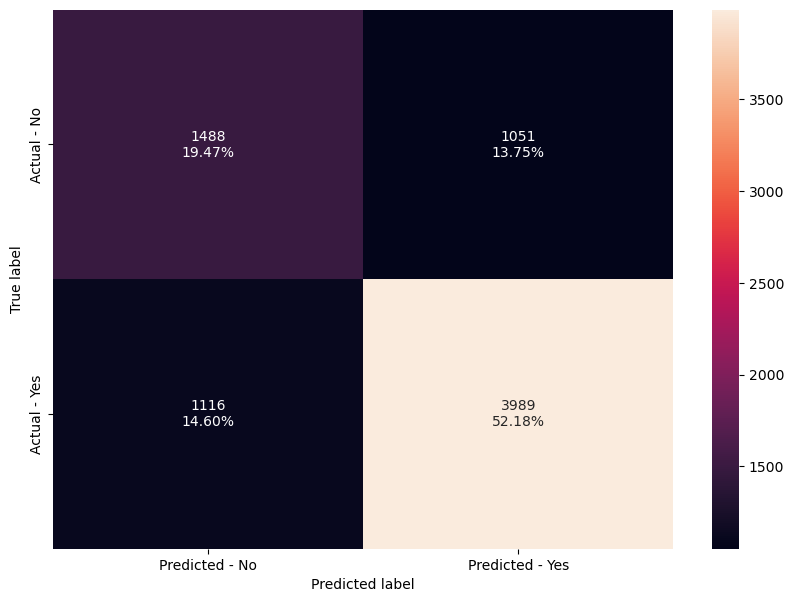

In [100]:
make_confusion_matrix(abc_tuned,y_test)

In [101]:
ab_tuned_classifier_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train,y_train)
print("Training performance \n",ab_tuned_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.718995  0.781247   0.794587  0.787861


In [102]:
ab_tuned_classifier_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_test,y_test)
print("Testing performance \n",ab_tuned_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.71651  0.781391   0.791468  0.786397


- Very Similar observations across all three parameters between training and testing set.

### Tuning - Gradient Boosting Classifier

In [103]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": np.arange(70,100,10),
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=1, n_estimators=80,
                           random_state=1, subsample=1)

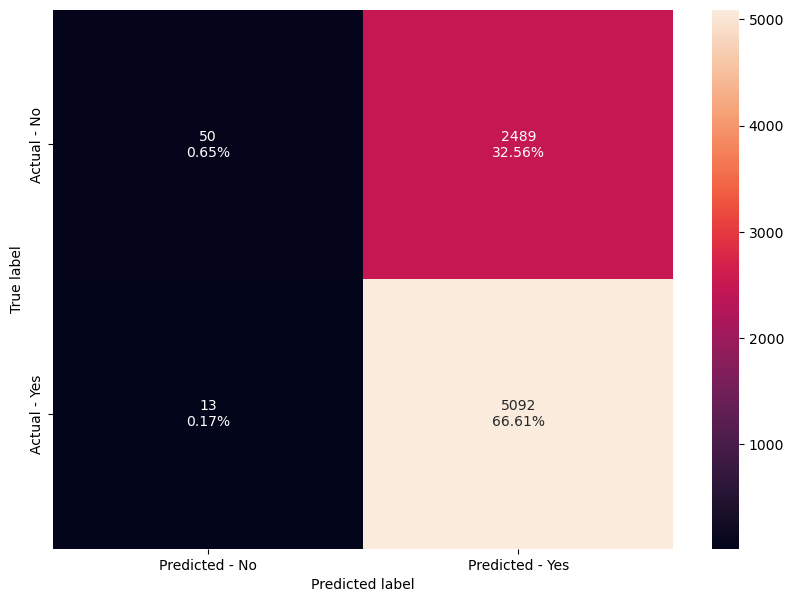

In [104]:
make_confusion_matrix(gbc_tuned,y_test)

In [105]:
gb_tuned_classifier_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train,y_train)
print("Training performance \n",gb_tuned_classifier_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.671451  0.996978   0.670979  0.802121


In [106]:
gb_tuned_classifier_model_test_perf = model_performance_classification_sklearn(gbc_tuned, X_test,y_test)
print("Testing performance \n",gb_tuned_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.672684  0.997453   0.671679  0.802775


- Very Similar observations across all three parameters between training and testing set. But we have seen better performance across different models.

### Stacking Classifier

In [107]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

estimators = [
    ("AdaBoost", abc_tuned),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = gbc_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5  # Number of cross-validation folds for the meta-estimator
)

# Fit the Stacking Classifier on the train data
stacking_classifier.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                         max_depth=1,
                                                                                         random_state=1),
                                                   learning_rate=0.1,
                                                   n_estimators=100,
                                                   random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=0.01,
                                                           max_features=1,
                                                           n_estimators=80,
                  

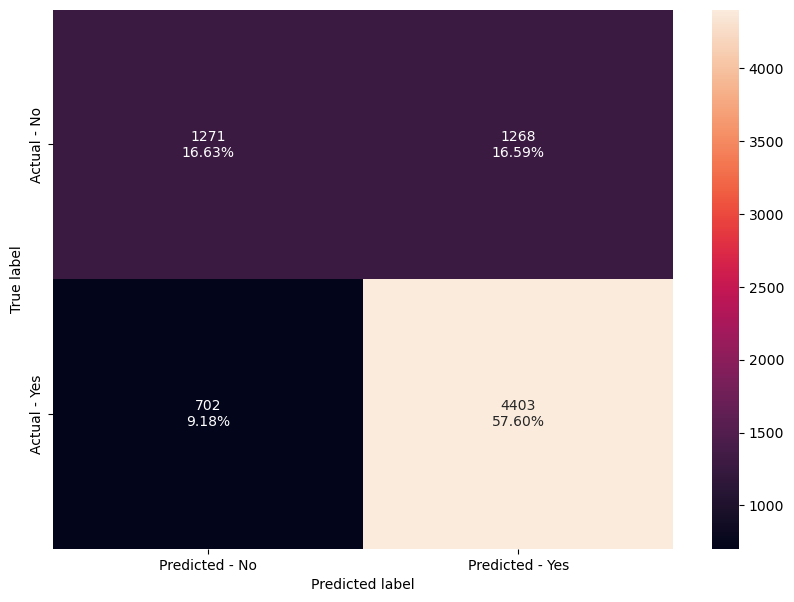

In [108]:
make_confusion_matrix(stacking_classifier,y_test)

In [109]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train,y_train)
print("Training performance \n",stacking_classifier_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.762166  0.88181    0.78754  0.832013


In [110]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier, X_test,y_test)
print("Testing performance \n",stacking_classifier_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.742282  0.862488   0.776406  0.817186


## Model Performance Comparison and Conclusions

In [111]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        bagging_model_train_perf.T,
        bagging_wt_model_train_perf.T,
        bagging_estimator_model_train_perf.T,
        rf_model_train_perf.T,
        rf_wt_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        ab_tuned_classifier_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gb_tuned_classifier_model_train_perf.T,
        Xgb_classifier_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Bagging Weighted Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Randon Forest Weighted Classifier",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Bagging Weighted Classifier,Tuned Bagging Classifier,Random Forest,Randon Forest Weighted Classifier,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,Stacking Classifier
Accuracy,1.0,0.712548,0.985198,0.982844,0.667919,0.999944,1.0,0.735591,0.738226,0.718995,0.758690,0.671451,0.838753,0.762166
Recall,1.0,0.931923,0.985982,0.983380,1.000000,0.999916,1.0,0.925963,0.887182,0.781247,0.881474,0.996978,0.931419,0.881810
Precision,1.0,0.720067,0.991810,0.990865,0.667919,1.000000,1.0,0.742079,0.760688,0.794587,0.784066,0.670979,0.843482,0.787540
F1,1.0,0.812411,0.988887,0.987108,0.800901,0.999958,1.0,0.823885,0.819080,0.787861,0.829922,0.802121,0.885272,0.832013


In [112]:
models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        bagging_model_test_perf.T,
        bagging_wt_model_test_perf.T,
        bagging_estimator_model_test_perf.T,
        rf_model_test_perf.T,
        rf_wt_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        ab_tuned_classifier_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gb_tuned_classifier_model_test_perf.T,
        Xgb_classifier_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Bagging Weighted Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Randon Forest Weighted Classifier",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Bagging Weighted Classifier,Tuned Bagging Classifier,Random Forest,Randon Forest Weighted Classifier,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,Stacking Classifier
Accuracy,0.652538,0.706567,0.691523,0.681450,0.667844,0.720827,0.717949,0.723836,0.734301,0.716510,0.745683,0.672684,0.733255,0.742282
Recall,0.728306,0.930852,0.764153,0.743193,1.000000,0.832125,0.816650,0.923800,0.885015,0.781391,0.874241,0.997453,0.860725,0.862488
Precision,0.745538,0.715447,0.771711,0.771452,0.667844,0.768869,0.773613,0.732526,0.757799,0.791468,0.774154,0.671679,0.767913,0.776406
F1,0.736821,0.809058,0.767913,0.757059,0.800847,0.799247,0.794549,0.817119,0.816481,0.786397,0.821159,0.802775,0.811675,0.817186


- The "Tuned Gradient Boost Classifier" and "XGBoost Classifier" seem to have the highest F1-scores, which suggests a good balance between precision and recall. These two models might be considered the best choices if you want to strike a balance between precision and recall.
- However, the "Tuned Gradient Boost Classifier" slightly outperforms the "XGBoost Classifier" in terms of F1-score and recall. So, if you prioritize recall and F1-score, the "Tuned Gradient Boost Classifier" might be the best model among the options.

In [113]:
print(pd.DataFrame(gbc_init.feature_importances_, columns = ["Imp"], 
                   index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10))

                                        Imp
education_of_employee_High School  0.288152
has_job_experience_Y               0.157908
prevailing_wage                    0.137679
education_of_employee_Master's     0.086721
education_of_employee_Doctorate    0.081133
continent_Europe                   0.067245
unit_of_wage_Year                  0.032480
region_of_employment_Midwest       0.032130
region_of_employment_South         0.022146
no_of_employees                    0.015848


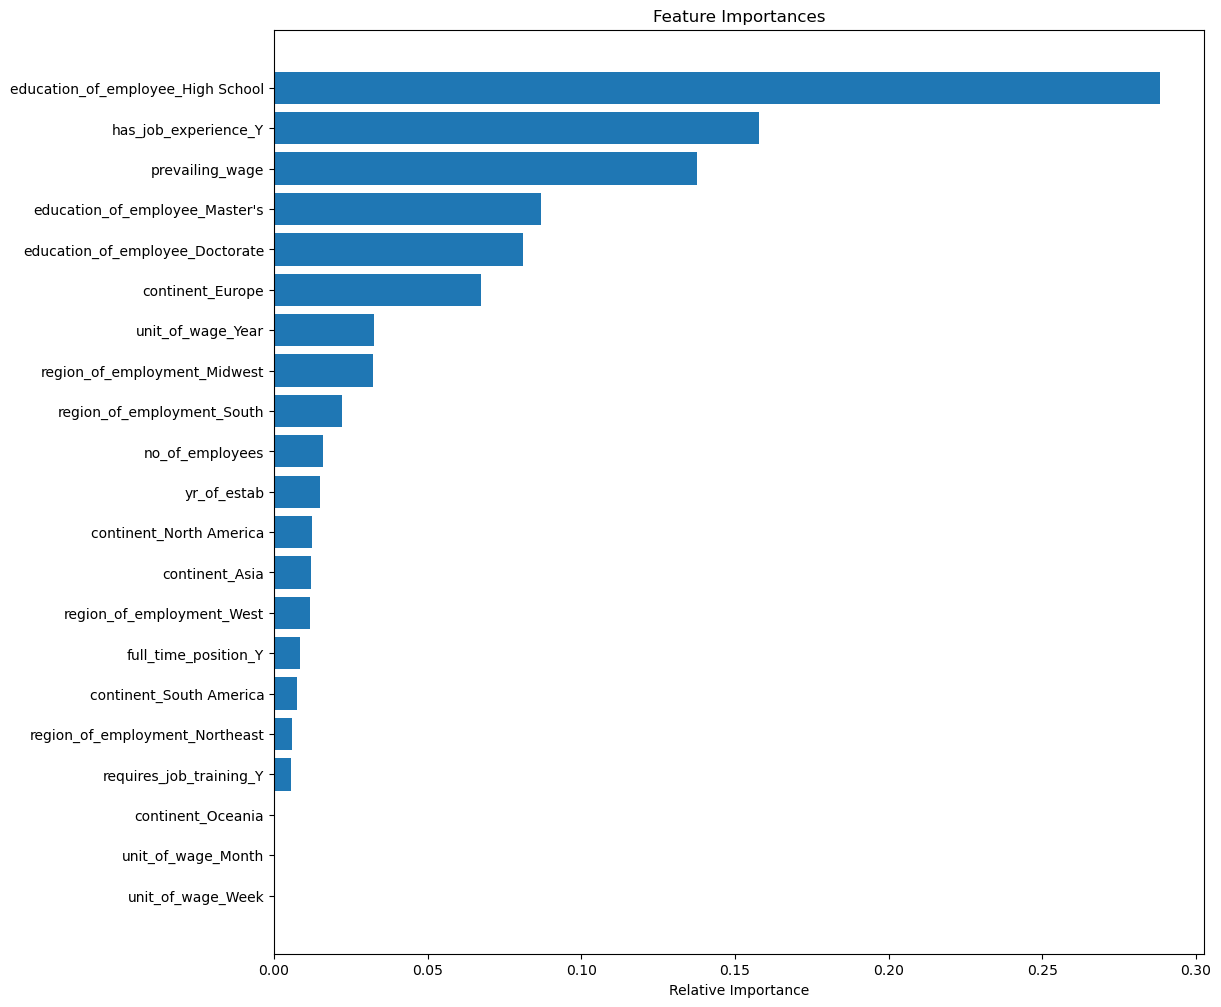

In [114]:
importances = gbc_init.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Actionable Insights and Recommendations

- The "Tuned Gradient Boost Classifier" and "XGBoost Classifier" seem to have the highest F1-scores, which suggests a good balance between precision and recall. These two models might be considered the best choices if you want to strike a balance between precision and recall.
- However, the "Tuned Gradient Boost Classifier" slightly outperforms the "XGBoost Classifier" in terms of F1-score and recall. So, if you prioritize recall and F1-score, the "Tuned Gradient Boost Classifier" might be the best model among the options.
- Education of the employee is the most important factor when it comes to visa screening , those who have high school diploma are have a very less chance of approval compared to those with masters degree.
- OLFC Should look at 3 important characterstics when shortlisting the candidate 
  - Education
  - Job Experience
  - Prevailingf wage
- The applications should be filtered on these three criterias before accepting their visa application. This will improve OLFC's approval percentage and will attract better candidates. 
